Let's start by importing all necessary Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree


Load and display the first few rows of the dataset for quick inspection.

In [ ]:
# Load the dataset
def load_dataset(filepath):
    df = pd.read_csv(filepath)
    return df

# Load data
df = load_dataset("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


 Remove irrelevant columns to clean the dataset for analysis.

In [ ]:
# Data Preparation and Preprocessing
# Drop unnecessary columns ('Unnamed: 32' and 'id')
df = df.drop(columns=['Unnamed: 32', 'id'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 Summarize dataset information, including row/column count and diagnosis distribution.

In [ ]:
# Display basic information about the dataset
def basic_info(df):
    print(f"Number of rows: {len(df)} | Number of columns: {len(df.iloc[0])}")
    benign_count = (df['diagnosis'] == 'B').sum()
    malignant_count = (df['diagnosis'] == 'M').sum()
    print(f"Number of benign: {benign_count} | Number of Malignant: {malignant_count}\n\nRatio: {benign_count / malignant_count:.2f}")

# Call basic_info function
basic_info(df)

Number of rows: 569 | Number of columns: 31
Number of benign: 357 | Number of Malignant: 212

Ratio: 1.68


 Analyze feature correlations in the dataset and visualize them using a heatmap

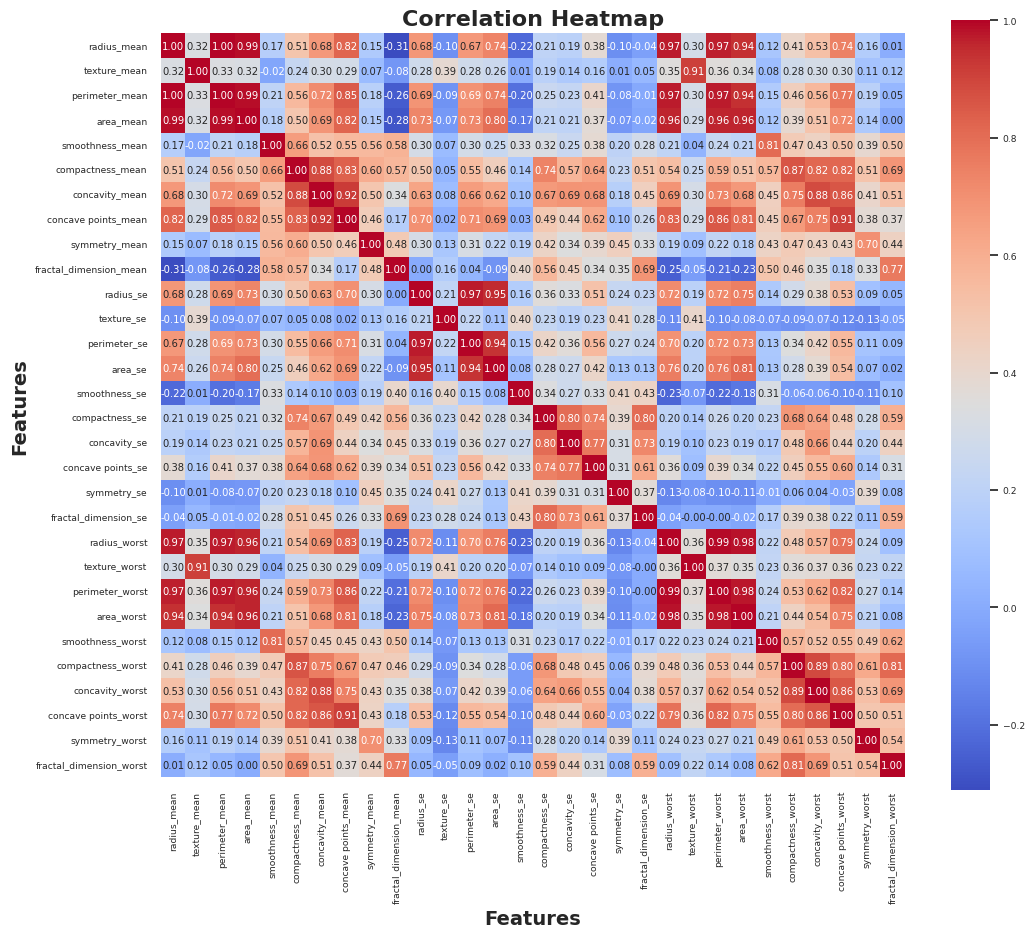

In [ ]:
# Find correlation between two columns
def find_correlation(df, X_name, Y_name):
    X = df[X_name]
    Y = df[Y_name]
    X = X.to_numpy()
    Y = Y.to_numpy()
    return np.corrcoef(X, Y)[0, 1]

# Find all correlations in the dataset
def find_all_correlations(df):
    columns = df.columns[1:]  # Exclude 'diagnosis'
    correlations = np.ndarray(shape=(len(columns), len(columns)), dtype=float)
    for i in range(len(columns)):
        for j in range(len(columns)):
            correlations[i][j] = find_correlation(df, columns[i], columns[j])
    return correlations

# Draw heatmap of correlations
def draw_heatmap(df, all_correlations):
    plt.figure(figsize=(12, 10))  # Adjust figure size as needed
    columns_names = df.columns[1:]
    sns.set(font_scale=0.6)  # Adjust font size for better readability
    sns.heatmap(all_correlations, annot=True, cmap='coolwarm', fmt='.2f', square=True, xticklabels=columns_names, yticklabels=columns_names)
    plt.title('Correlation Heatmap', fontsize=16, weight='bold')
    plt.xlabel('Features', fontsize=14, weight='bold')
    plt.ylabel('Features', fontsize=14, weight='bold')
    plt.show()

# Perform correlation analysis and draw heatmap
all_correlations = find_all_correlations(df)
draw_heatmap(df, all_correlations)


 Standardize dataset features using Standard Scaler for improved model performance and display a preview of the standardized data.

In [ ]:
# Standardize features
def standardize_features(df):
    X = df.drop(columns="diagnosis").values
    y = np.array(df["diagnosis"] == 'M')  # Encode diagnosis as binary
    X_scaled = StandardScaler().fit_transform(X)
    return X_scaled, y, df.drop(columns="diagnosis").columns

# Standardize the dataset
X_scaled, y, feature_names = standardize_features(df)

# Display standardized features as a DataFrame
standardized_df = pd.DataFrame(X_scaled, columns=feature_names)
print("Standardized Features:")
standardized_df.head()


Standardized Features:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


 Perform Principal Component Analysis (PCA) to reduce dimensionality and visualize key feature relationships.

<Figure size 1200x800 with 0 Axes>

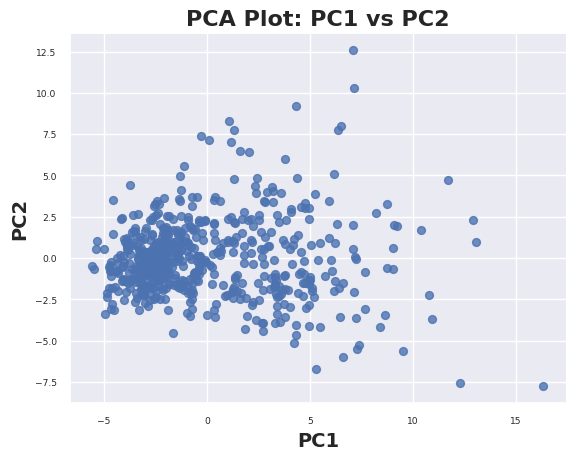

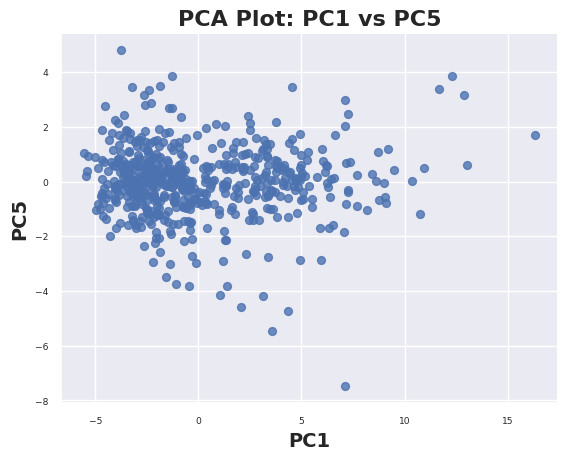

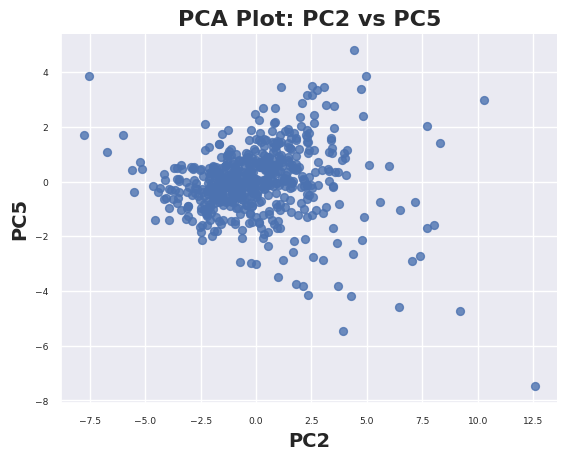

In [ ]:
# Perform PCA
def perform_pca(X_scaled, n_components=5):
    pca = PCA(n_components=n_components)  # Reduce to n components
    principalComponents = pca.fit_transform(X_scaled)
    return pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Plot PCA results
def plot_pca_results(principalDf):
    plt.figure(figsize=(12, 8))
    for i, (x, y) in enumerate([('PC1', 'PC2'), ('PC1', 'PC5'), ('PC2', 'PC5')]):
        principalDf.plot(kind='scatter', x=x, y=y, s=32, alpha=.8)
        plt.gca().spines[['top', 'right']].set_visible(False)
        plt.title(f'PCA Plot: {x} vs {y}', fontsize=16, weight='bold')
        plt.xlabel(x, fontsize=14, weight='bold')
        plt.ylabel(y, fontsize=14, weight='bold')
        plt.show()

# Perform PCA and plot results
principalDf = perform_pca(X_scaled)
plot_pca_results(principalDf)


Split the dataset into training and test sets to evaluate model performance.

In [ ]:
# Split data into training and test sets
def split_data(X_scaled, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)
    print("Training set size:", X_train.shape[0])
    print("Test set size:", X_test.shape[0])
    return X_train, X_test, y_train, y_test

# Split dataset
X_train, X_test, y_train, y_test = split_data(X_scaled, y)


Training set size: 455
Test set size: 114


Trains and evaluates various machine learning models (Random Forest, Logistic Regression, and SVM) on the standardized dataset, providing accuracy metrics and a visual comparison.

Results for Random Forest:
Accuracy of RandomForestClassifier: 0.96
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



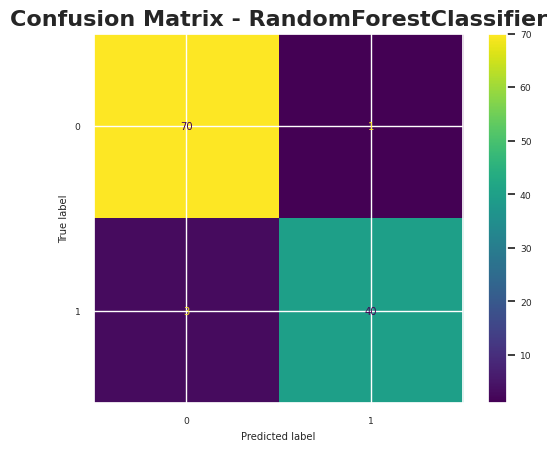

Results for Logistic Regression:
Accuracy of LogisticRegression: 0.97
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.99      0.98        71
        True       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



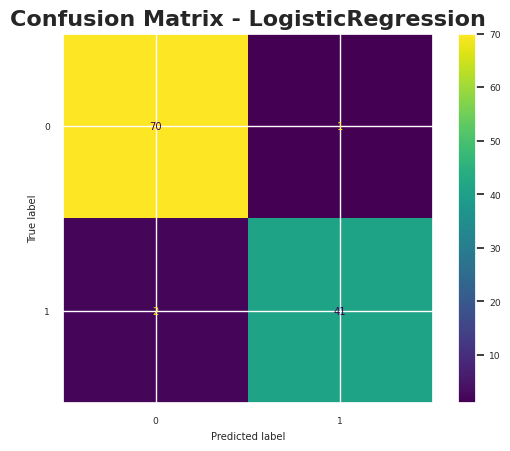

Results for SVM:
Accuracy of SVC: 0.97
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.99      0.98        71
        True       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



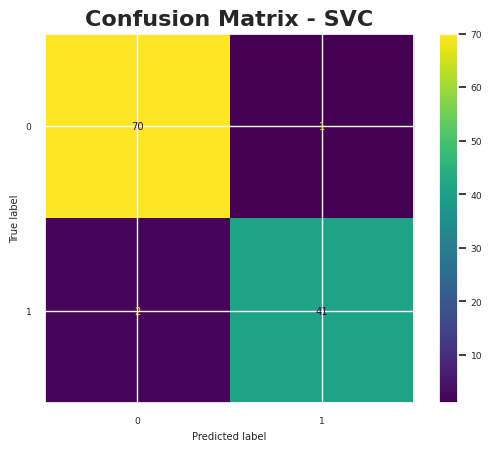

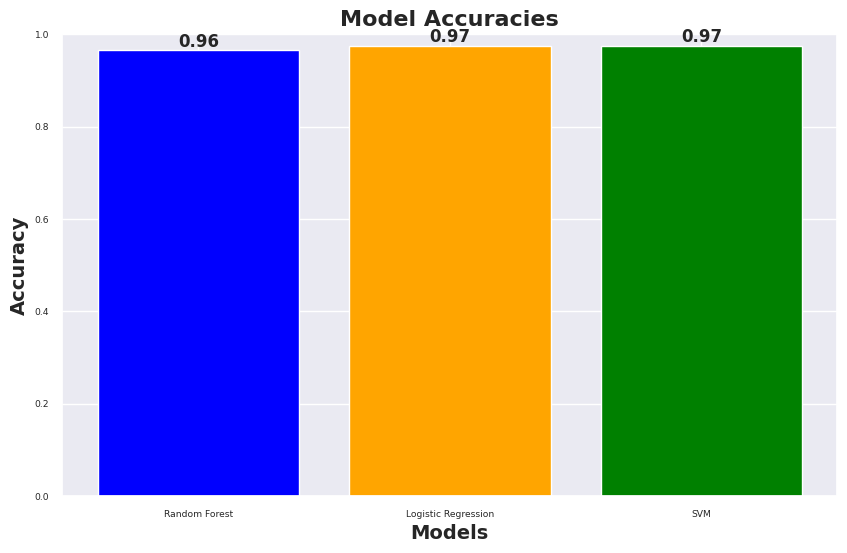

In [ ]:
# Train and evaluate model
def show_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model.__class__.__name__}: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.title(f'Confusion Matrix - {model.__class__.__name__}', fontsize=16, weight='bold')
    plt.show()
    return accuracy

# Train models and store their accuracies
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42)
}

model_accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Results for {name}:")
    accuracy = show_accuracy(model, X_test, y_test)
    model_accuracies[name] = accuracy

# Plot model accuracies in a bar chart
def plot_model_accuracies(model_accuracies):
    plt.figure(figsize=(10, 6))
    plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'orange', 'green'])
    plt.xlabel('Models', fontsize=14, weight='bold')
    plt.ylabel('Accuracy', fontsize=14, weight='bold')
    plt.title('Model Accuracies', fontsize=16, weight='bold')
    plt.ylim(0.0, 1.0)  # Set y-axis limits to show as percentage
    for i, (key, value) in enumerate(model_accuracies.items()):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12, weight='bold')
    plt.show()

plot_model_accuracies(model_accuracies)


Principal Component Analysis (PCA): Reduces the dataset to 5 components while preserving the majority of variance.Applies PCA, trains Random Forest, Logistic Regression, and SVM, evaluates with accuracy, F1 score, confusion matrices, and plots model accuracies.

Explained Variance Ratio (First 5 Components): [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]

Results for Random Forest:
Accuracy of Random Forest: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



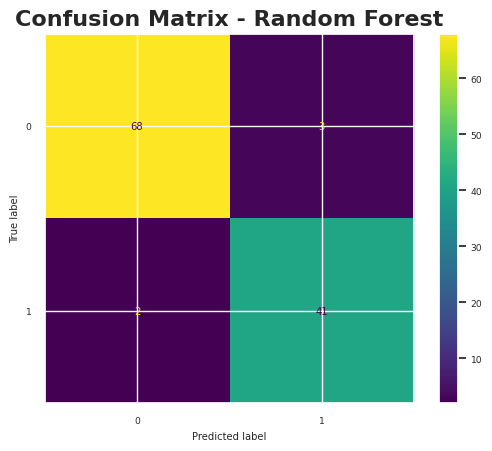


Results for Logistic Regression:
Accuracy of Logistic Regression: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



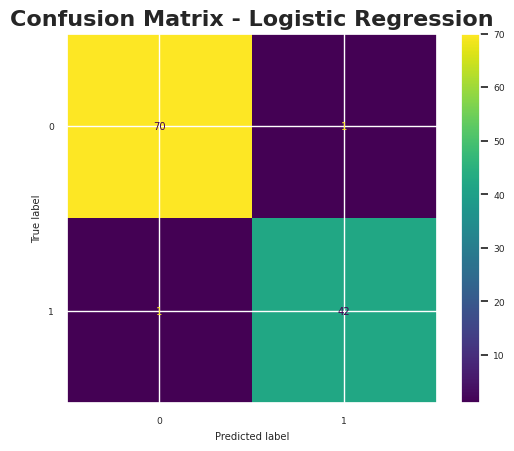


Results for SVM:
Accuracy of SVM: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



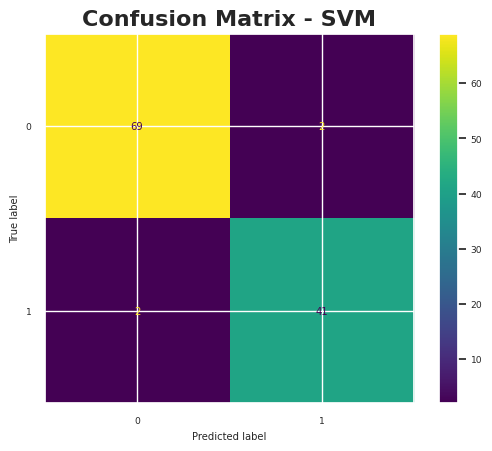

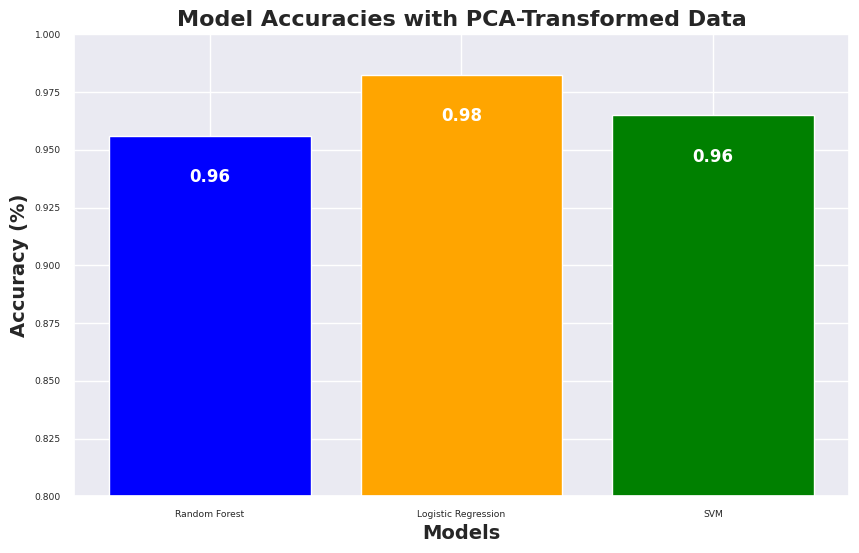

In [ ]:
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, classification_report

# Perform PCA
def apply_pca(X_scaled, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    print(f"Explained Variance Ratio (First {n_components} Components): {pca.explained_variance_ratio_}")
    return X_pca

# Apply PCA with 5 components
n_components = 5
X_pca = apply_pca(X_scaled, n_components)

# Split PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define base models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42)
}

# Train and evaluate models on PCA-transformed data
model_accuracies = {}

for name, model in models.items():
    model.fit(X_train_pca, y_train_pca)
    y_pred = model.predict(X_test_pca)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test_pca, y_pred)
    f1 = f1_score(y_test_pca, y_pred)
    model_accuracies[name] = accuracy

    # Print results in the desired format
    print(f"\nResults for {name}:")
    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report:\n{classification_report(y_test_pca, y_pred, target_names=['0', '1'])}")

    # Display confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred, display_labels=["0", "1"])
    plt.title(f'Confusion Matrix - {name}', fontsize=16, weight='bold')
    plt.show()

# Plot model accuracies with values
plt.figure(figsize=(10, 6))
bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Models', fontsize=14, weight="bold")
plt.ylabel('Accuracy (%)', fontsize=14, weight="bold")
plt.title('Model Accuracies with PCA-Transformed Data', fontsize=16, weight="bold")
plt.ylim(0.8, 1.0)

# Add accuracy values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02,
             f"{bar.get_height():.2f}", ha='center', fontsize=12, color="white", weight="bold")

plt.show()


Applies L1 and L2 regularization techniques to perform feature selection and enhance model performance with hyperparameter tuning using Randomized search on a dataset."


Performing Random Search for L1 Regularization...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Results for Random Forest (L1 Regularization):
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



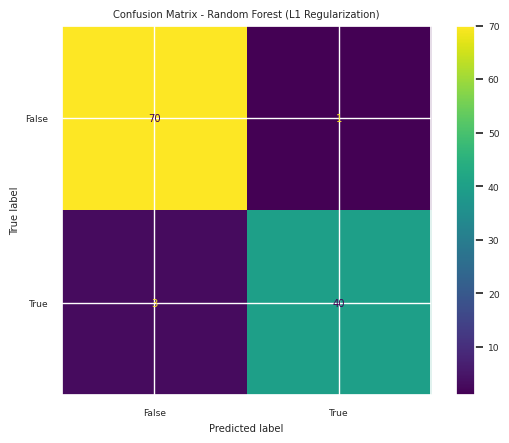


Performing Random Search for L2 Regularization...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Results for Random Forest (L2 Regularization):
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



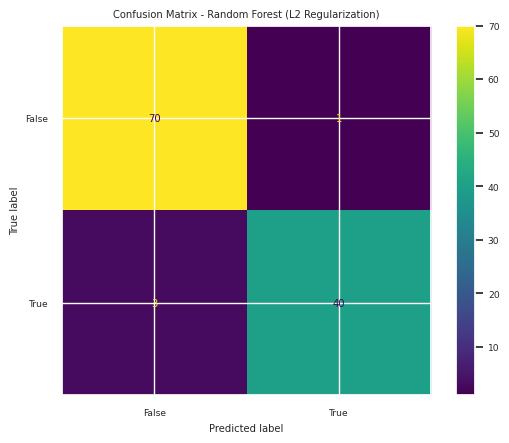

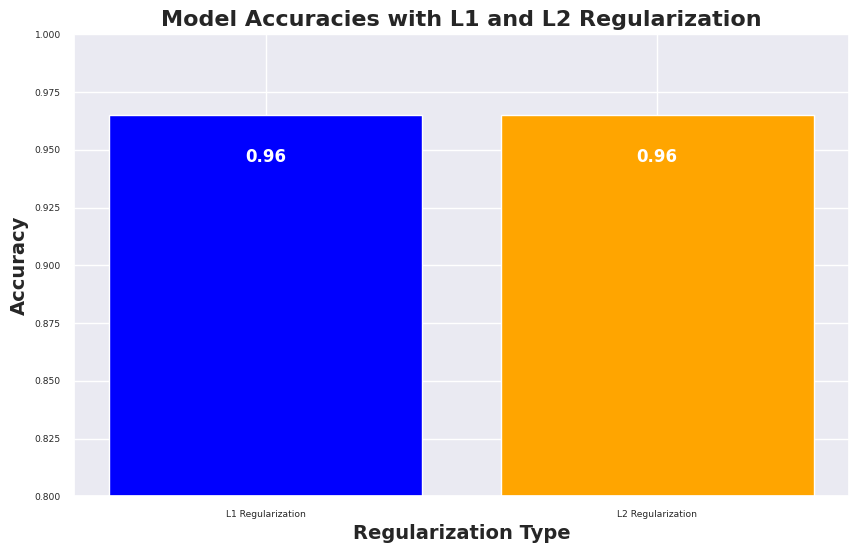

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Define a function for RandomizedSearchCV
def tune_model(model, param_grid, X_train, y_train, n_iter=10, cv=5, verbose=2, random_state=42):
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=n_iter,
        scoring='accuracy',
        cv=cv,
        verbose=verbose,
        random_state=random_state,
        n_jobs=-1
    )
    randomized_search.fit(X_train, y_train)
    return randomized_search.best_estimator_

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### L1 Regularization (Lasso)
# Feature selection using Lasso
def feature_selection_lasso(X_scaled, y, alpha=0.01):
    lasso = Lasso(alpha=alpha)
    feature_selector = SelectFromModel(lasso)
    return feature_selector.fit_transform(X_scaled, y)

# Perform L1 Regularization and split the data
X_l1 = feature_selection_lasso(X_scaled, y)
X_train_l1, X_test_l1, y_train_l1, y_test_l1 = train_test_split(X_l1, y, test_size=0.2, random_state=42)

# Train Random Forest with hyperparameter tuning on L1-transformed data
print("\nPerforming Random Search for L1 Regularization...")
rf_tuned_l1 = tune_model(RandomForestClassifier(random_state=42), param_grid_rf, X_train_l1, y_train_l1)

# Evaluate the tuned model on the test set
print("\nResults for Random Forest (L1 Regularization):")
y_pred_l1 = rf_tuned_l1.predict(X_test_l1)
print(f"Accuracy: {accuracy_score(y_test_l1, y_pred_l1):.2f}")
print(f"Classification Report:\n{classification_report(y_test_l1, y_pred_l1)}")
ConfusionMatrixDisplay.from_predictions(y_test_l1, y_pred_l1)
plt.title("Confusion Matrix - Random Forest (L1 Regularization)")
plt.show()

### L2 Regularization (Ridge)
# Apply Ridge for L2 Regularization (scaling without feature selection)
def apply_l2_regularization(X_scaled, alpha=1.0):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y)
    return X_scaled  # Return scaled features, as Ridge doesn't reduce feature count

# Perform L2 Regularization and split the data
X_l2 = apply_l2_regularization(X_scaled)
X_train_l2, X_test_l2, y_train_l2, y_test_l2 = train_test_split(X_l2, y, test_size=0.2, random_state=42)

# Train Random Forest with hyperparameter tuning on L2-transformed data
print("\nPerforming Random Search for L2 Regularization...")
rf_tuned_l2 = tune_model(RandomForestClassifier(random_state=42), param_grid_rf, X_train_l2, y_train_l2)

# Evaluate the tuned model on the test set
print("\nResults for Random Forest (L2 Regularization):")
y_pred_l2 = rf_tuned_l2.predict(X_test_l2)
print(f"Accuracy: {accuracy_score(y_test_l2, y_pred_l2):.2f}")
print(f"Classification Report:\n{classification_report(y_test_l2, y_pred_l2)}")
ConfusionMatrixDisplay.from_predictions(y_test_l2, y_pred_l2)
plt.title("Confusion Matrix - Random Forest (L2 Regularization)")
plt.show()
# Collect the accuracies for L1 and L2
accuracy_l1 = accuracy_score(y_test_l1, y_pred_l1)
accuracy_l2 = accuracy_score(y_test_l2, y_pred_l2)

# Bar Chart for L1 and L2 Accuracies
regularization_accuracies = {
    "L1 Regularization": accuracy_l1,
    "L2 Regularization": accuracy_l2
}

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(regularization_accuracies.keys(), regularization_accuracies.values(), color=['blue', 'orange'])
plt.xlabel('Regularization Type', fontsize=14, weight="bold")
plt.ylabel('Accuracy', fontsize=14, weight="bold")
plt.title('Model Accuracies with L1 and L2 Regularization', fontsize=16, weight="bold")
plt.ylim(0.8, 1.0)

# Add accuracy values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02,
             f"{bar.get_height():.2f}", ha='center', fontsize=12, color="white", weight="bold")

plt.show()



Tunes hyperparameters for Random Forest, Logistic Regression, and SVM using RandomizedSearchCV, evaluates their performance on the test set, and visualizes the accuracy in a bar chart forcomparison.


Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Results for Random Forest:
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



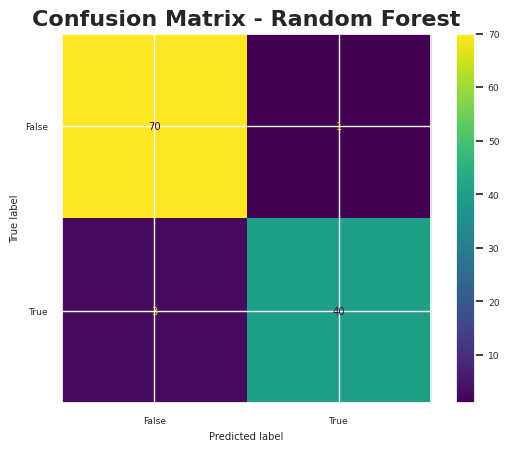


Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Results for Logistic Regression:
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99        71
        True       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



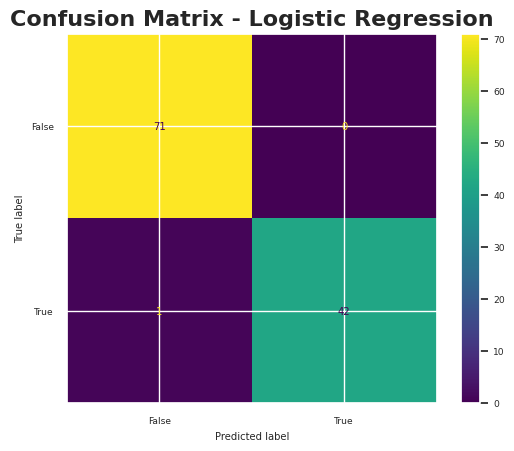


Tuning hyperparameters for SVM...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Results for SVM:
Best Parameters: {'kernel': 'linear', 'degree': 3, 'C': 0.1}
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99        71
        True       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



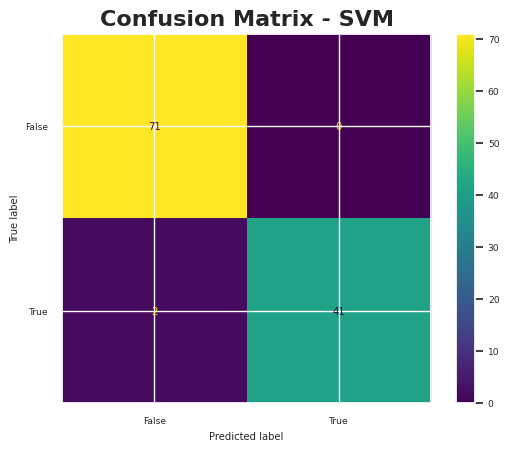

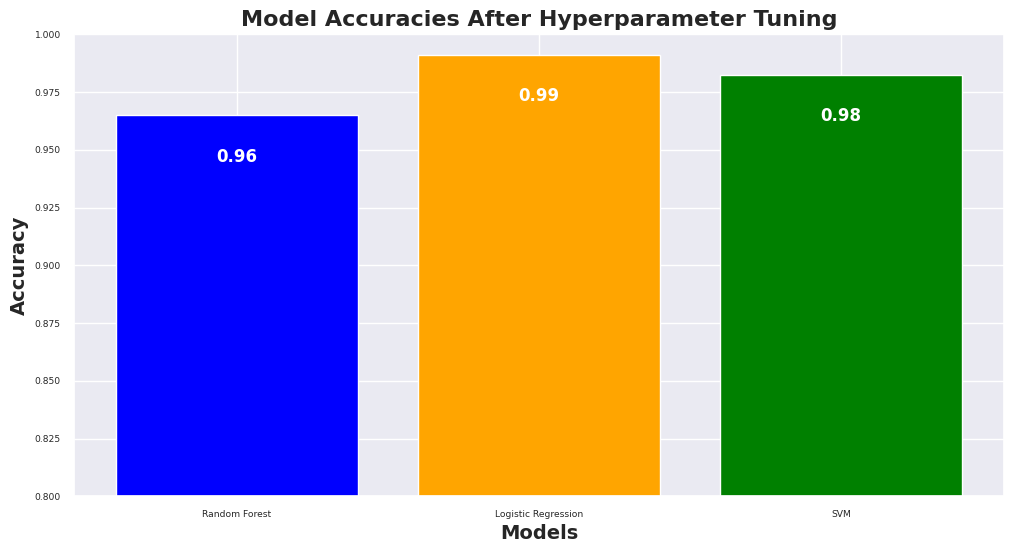

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [3, 4, 5]
}

# Define models
models = {
    "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
    "Logistic Regression": (LogisticRegression(max_iter=1000, random_state=42), param_grid_lr),
    "SVM": (SVC(random_state=42), param_grid_svm)
}

# Hyperparameter tuning and evaluation
tuned_model_accuracies = {}
for model_name, (model, param_grid) in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    tuner = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=20,
        scoring='accuracy',
        cv=5,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    tuner.fit(X_train, y_train)
    best_model = tuner.best_estimator_
    y_pred = best_model.predict(X_test)

    # Store accuracy
    tuned_model_accuracies[model_name] = accuracy_score(y_test, y_pred)

    # Display results
    print(f"\nResults for {model_name}:")
    print(f"Best Parameters: {tuner.best_params_}")
    print(f"Accuracy: {tuned_model_accuracies[model_name]:.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16, weight='bold')
    plt.show()

# Plot model accuracies
plt.figure(figsize=(12, 6))
bars = plt.bar(tuned_model_accuracies.keys(), tuned_model_accuracies.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Models', fontsize=14, weight="bold")
plt.ylabel('Accuracy', fontsize=14, weight="bold")
plt.title('Model Accuracies After Hyperparameter Tuning', fontsize=16, weight="bold")
plt.ylim(0.8, 1.0)

# Add accuracy values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02,
             f"{bar.get_height():.2f}", ha='center', fontsize=12, color="white", weight="bold")

plt.show()


Hyperparameter tuning using RandomizedSearchCV for the Random Forest model, evaluating its performance with accuracy and a confusion matrix, and visualizing a decision tree for insights into the model's decisions.


Performing Hyperparameter Tuning for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Results for Tuned Random Forest:
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



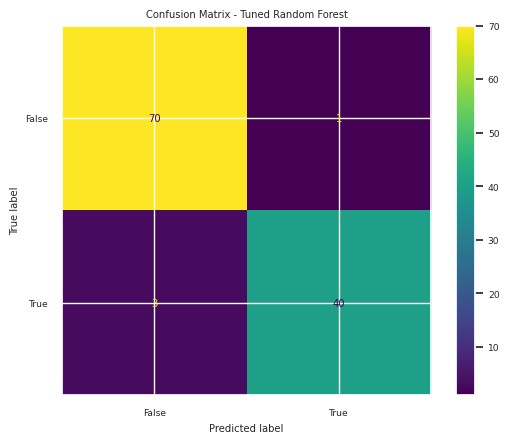


Visualizing Decision Tree for Tuned Random Forest...


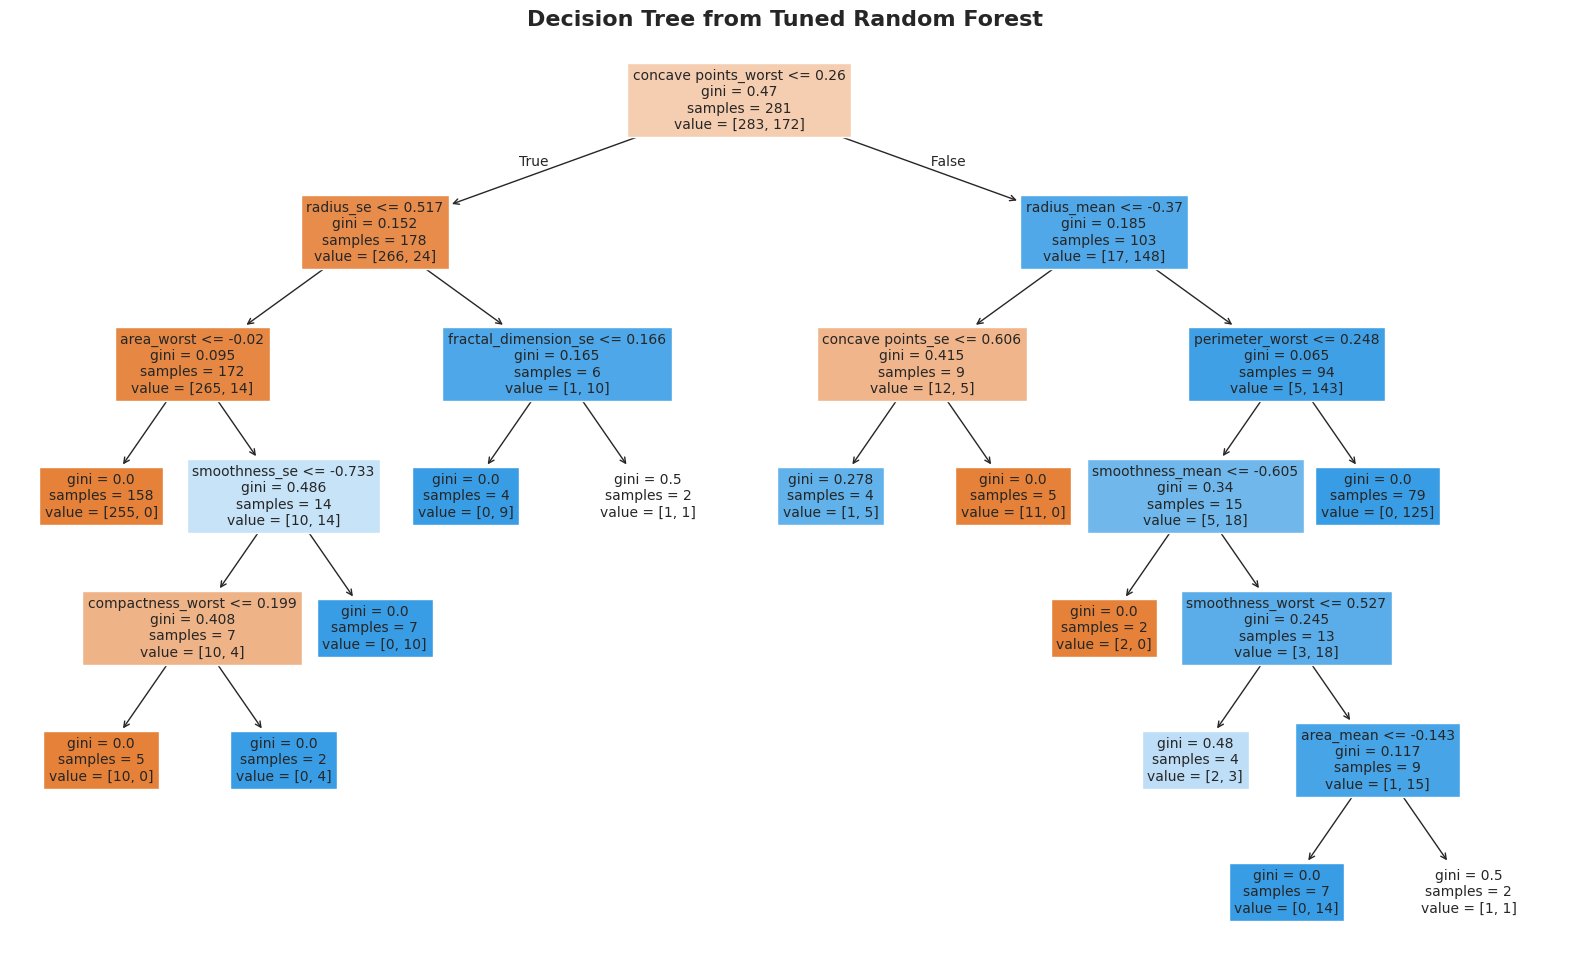

In [ ]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Define a function for RandomizedSearchCV
def tune_model(model, param_grid, X_train, y_train, n_iter=10, cv=5, verbose=2, random_state=42):
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=n_iter,
        scoring='accuracy',
        cv=cv,
        verbose=verbose,
        random_state=random_state,
        n_jobs=-1
    )
    randomized_search.fit(X_train, y_train)
    return randomized_search.best_estimator_

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning
print("\nPerforming Hyperparameter Tuning for Random Forest...")
rf_tuned = tune_model(RandomForestClassifier(random_state=42), param_grid_rf, X_train, y_train)

# Evaluate the tuned model
print("\nResults for Tuned Random Forest:")
y_pred_rf_tuned = rf_tuned.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf_tuned)}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_tuned)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

# Visualize a decision tree from the Random Forest
def visualize_decision_tree(model, feature_names):
    if hasattr(model, "estimators_"):
        plt.figure(figsize=(20, 12))
        plot_tree(model.estimators_[0], feature_names=feature_names, filled=True, fontsize=10)
        plt.title("Decision Tree from Tuned Random Forest", fontsize=16, weight="bold")
        plt.show()
    else:
        print("The model does not have 'estimators_' attribute. Ensure the model is a Random Forest.")

# Add decision tree visualization
print("\nVisualizing Decision Tree for Tuned Random Forest...")
visualize_decision_tree(rf_tuned, df.drop(columns="diagnosis").columns)



Performs GridSearchCV to tune models, evaluates accuracy, classification reports, confusion matrices, and plots model accuracies.


Performing Grid Search for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Results for Random Forest:
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97        71
        True       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



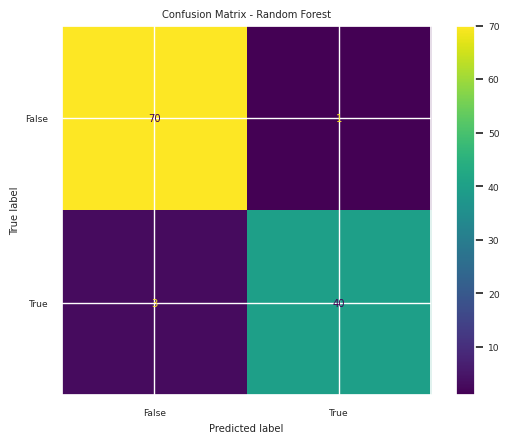


Performing Grid Search for Logistic Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Results for Logistic Regression:
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99        71
        True       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



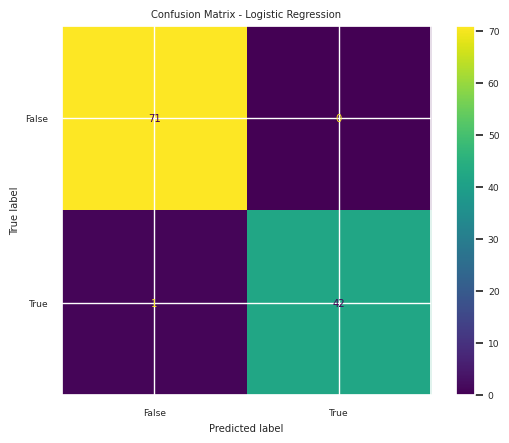


Performing Grid Search for SVM...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for SVM: {'C': 0.1, 'degree': 3, 'kernel': 'linear'}

Results for SVM:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99        71
        True       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



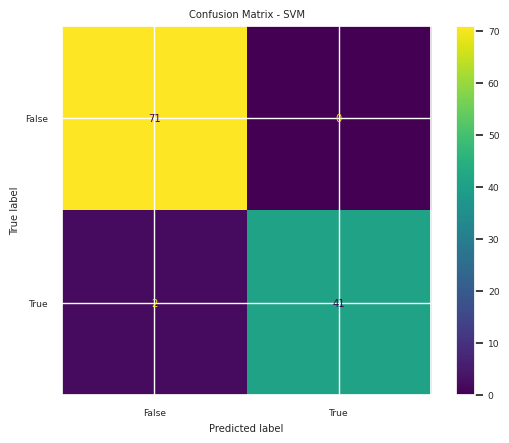

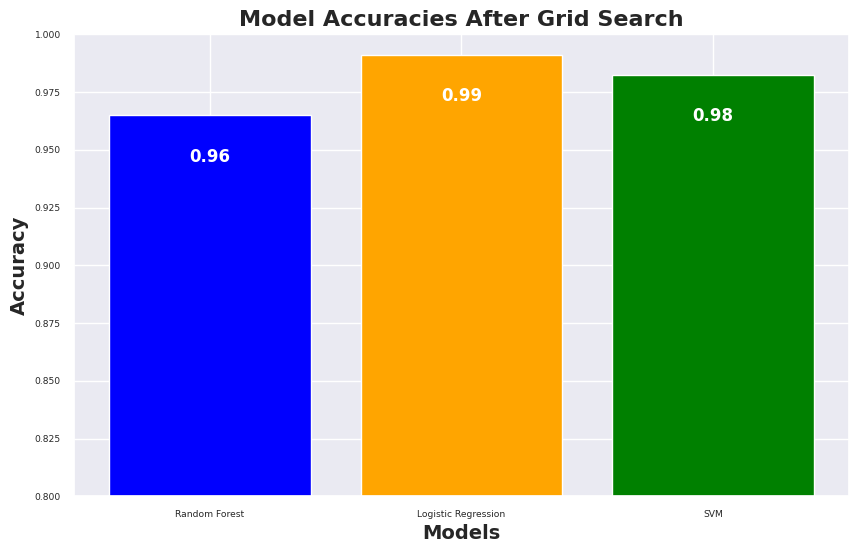

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [3, 4]  # Only applicable for 'poly' kernel
}

# Models dictionary
models = {
    "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
    "Logistic Regression": (LogisticRegression(max_iter=1000, random_state=42), param_grid_lr),
    "SVM": (SVC(random_state=42), param_grid_svm)
}

# Perform Grid Search and evaluate models
grid_search_results = {}
for model_name, (model, param_grid) in models.items():
    print(f"\nPerforming Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=2,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = grid_search.best_estimator_
    grid_search_results[model_name] = best_model
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nResults for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Display confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Bar Chart of Model Accuracies
accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in grid_search_results.items()}
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Models', fontsize=14, weight="bold")
plt.ylabel('Accuracy', fontsize=14, weight="bold")
plt.title('Model Accuracies After Grid Search', fontsize=16, weight="bold")

# Add accuracy values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02,
             f"{bar.get_height():.2f}", ha='center', fontsize=12, color="white", weight="bold")

plt.ylim(0.8, 1.0)
plt.show()


The optimized Logistic Regression model, selected for its high accuracy and balanced metrics during Grid Search, was applied to the unlabelled dataset (WBCD2.csv). Patient IDs were preserved, and the data was scaled using the same StandardScaler as in training.

In [ ]:
# Load the unlabelled dataset
df_unlabelled = pd.read_csv("/content/WBCD2.csv")

# Drop unnecessary columns
unlabelled_ids = df_unlabelled["id"]  # Preserve IDs for reference
X_unlabelled = df_unlabelled.drop(columns=["id"])

# Ensure the data is scaled using the same scaler as training
X_unlabelled_scaled = StandardScaler().fit_transform(X_unlabelled)

# Use the best performing model (Logistic Regression after hyperparameter tuning)
best_model = grid_search_results["Logistic Regression"]

# Predict on the unlabelled dataset
unlabelled_predictions = best_model.predict(X_unlabelled_scaled)

# Display predictions summary
b_count = np.sum(unlabelled_predictions == 0)
m_count = np.sum(unlabelled_predictions == 1)
print(f"Predicted 'B' (Benign): {b_count}")
print(f"Predicted 'M' (Malignant): {m_count}")

# Save predictions to CSV with required columns
def format_prediction(pred):
    return "B" if pred == 0 else "M"

predictions_dict = {
    "ID": unlabelled_ids,
    "Predicted Diagnosis": [format_prediction(pred) for pred in unlabelled_predictions]
}
predictions_df = pd.DataFrame(predictions_dict)
predictions_df.to_csv("logistic_regression_predictions.csv", index=False)
print("Predictions saved to 'logistic_regression_predictions.csv'.")


Predicted 'B' (Benign): 116
Predicted 'M' (Malignant): 82
Predictions saved to 'logistic_regression_predictions.csv'.


In [ ]:
from google.colab import files
files.download("logistic_regression_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Conclusion:
In this project, we applied Random Forest, Logistic Regression, and SVM models to predict breast cancer diagnoses. Key techniques included data preprocessing, L1 and L2 regularization for feature selection, PCA for dimensionality reduction, and hyperparameter tuning using Grid Search and Randomized Search.

The results showed:

Logistic Regression: Achieved the highest accuracy of 99%, with excellent precision and recall.
SVM: Reached 98% accuracy, performing robustly across metrics.
Random Forest: Achieved 96% accuracy, slightly less sensitive to malignant cases.
Logistic Regression emerged as the best model due to its simplicity, efficiency, and top performance, demonstrating the effectiveness of proper preprocessing and optimization techniques in predictive modeling.